# 06 EDA: Additional Visualizations

Description: Creating additional visualizations to plot features against mosquito abundance for use in our presentation. 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Reading in data

In [5]:
df = pd.read_csv('../data/final_dataframe_features.csv', index_col = 0)

Checking columns

In [120]:
df.columns

Index(['Trap', 'Species', 'NumMosquitos', 'WnvPresent', 'Day_length', 'Tmax',
       'Tmin', 'Tavg', 'ResultSpeed', 'ResultDir', 'AvgSpeed', 'Sunset',
       'Sunrise', 'Heat', 'Depart', 'DewPoint', 'WetBulb', 'Cool', 'CodeSum',
       'PrecipTotal', 'StnPressure', 'Latitude', 'Longitude', 'Month',
       'Day_length_exp', 'Tavg_shift', 'Heat_exp', 'Cool_shift', 'Tmax_shift',
       'Tmin_shift', 'Depart_shift', 'ResultSpeed_shift', 'ResultDir_exp',
       'PrecipTotal_exp', 'WetBulb_exp'],
      dtype='object')

Creating dataframes by grouping species and west nile virus present. Also Number of Mosquitos will be counted as opposed to sum. This dataframe will be used to generate plots

In [208]:
dfWNV = df[df['WnvPresent'] == 1].groupby(['Species', 'WnvPresent'])[['NumMosquitos']].count().reset_index()
dfWNV0 = df[df['WnvPresent'] == 0].groupby(['Species', 'WnvPresent'])[['NumMosquitos']].count().reset_index()

Viewing the newly created dataframe

In [217]:
dfWNV

,Species,WnvPresent,NumMosquitos
0,CULEX PIPIENS,1,190
1,CULEX PIPIENS/RESTUANS,1,229
2,CULEX RESTUANS,1,49
3,CULEX ERRATICUS,0,0
4,CULEX SALINARIUS,0,0
5,CULEX TARSALIS,0,0
6,CULEX TERRITANS,0,0


Appending the species that can't carry WNV to the dataframe where WNV is present so that the two dataframe's have the same shape

In [210]:
dfWNV = dfWNV.append({'Species': 'CULEX ERRATICUS', 'WnvPresent': 0, 'NumMosquitos': 0}, ignore_index=True)
dfWNV = dfWNV.append({'Species': 'CULEX SALINARIUS', 'WnvPresent': 0, 'NumMosquitos': 0}, ignore_index=True)
dfWNV = dfWNV.append({'Species': 'CULEX TARSALIS', 'WnvPresent': 0, 'NumMosquitos': 0}, ignore_index=True)
dfWNV = dfWNV.append({'Species': 'CULEX TERRITANS', 'WnvPresent': 0, 'NumMosquitos': 0}, ignore_index=True)
dfWNV

,Species,WnvPresent,NumMosquitos
0,CULEX PIPIENS,1,190
1,CULEX PIPIENS/RESTUANS,1,229
2,CULEX RESTUANS,1,49
3,CULEX ERRATICUS,0,0
4,CULEX SALINARIUS,0,0
5,CULEX TARSALIS,0,0
6,CULEX TERRITANS,0,0


Inspecting the dataframe

In [211]:
dfWNV0

,Species,WnvPresent,NumMosquitos
0,CULEX ERRATICUS,0,1
1,CULEX PIPIENS,0,1795
2,CULEX PIPIENS/RESTUANS,0,3674
3,CULEX RESTUANS,0,2396
4,CULEX SALINARIUS,0,83
5,CULEX TARSALIS,0,6
6,CULEX TERRITANS,0,220


### Plotting Mosquito Abundances with WNV vs. Without

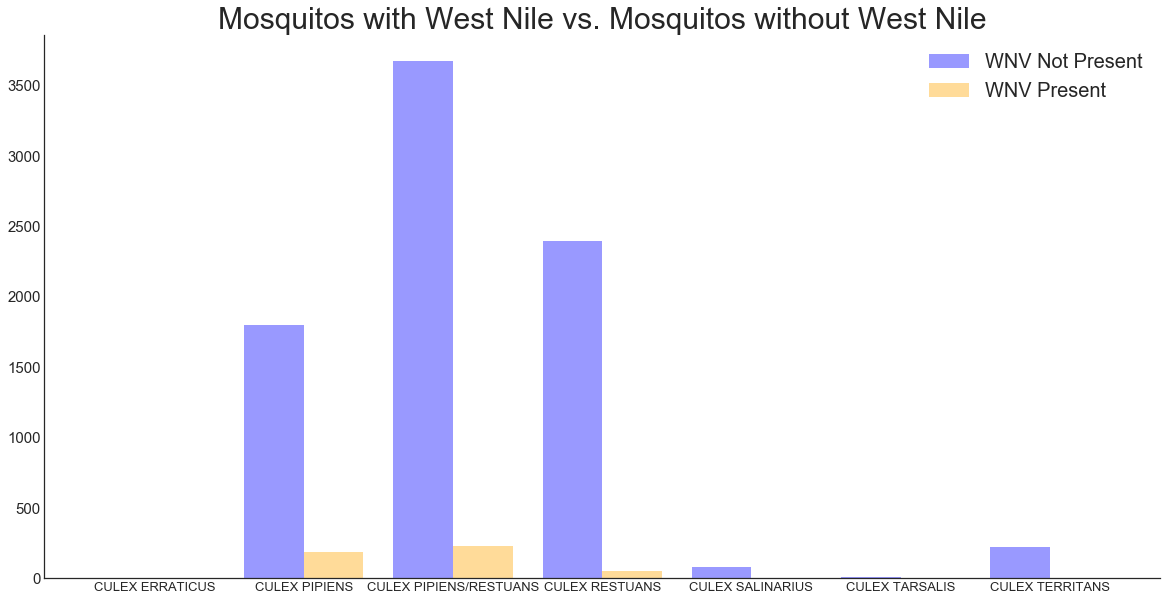

In [214]:
import matplotlib.style as style
style.use('seaborn-white')
fig, ax = plt.figure(figsize=(20,10)), plt.gca()
locs, labels = plt.xticks(fontsize=13)
plt.yticks(fontsize=15)
plt.setp(labels, rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Mosquitos with West Nile vs. Mosquitos without West Nile", fontsize=30)
plt.bar(dfWNV0['Species'], dfWNV0['NumMosquitos'], align='edge', width=-.4, color = "blue", alpha = .4)
plt.bar(dfWNV['Species'], dfWNV['NumMosquitos'], align='edge', width=.4, color = "orange", alpha = .4)
plt.legend(labels=['WNV Not Present','WNV Present'], fontsize=20);

### Plotting Month vs. Max Temperature Shifted (shifted by 1 week)

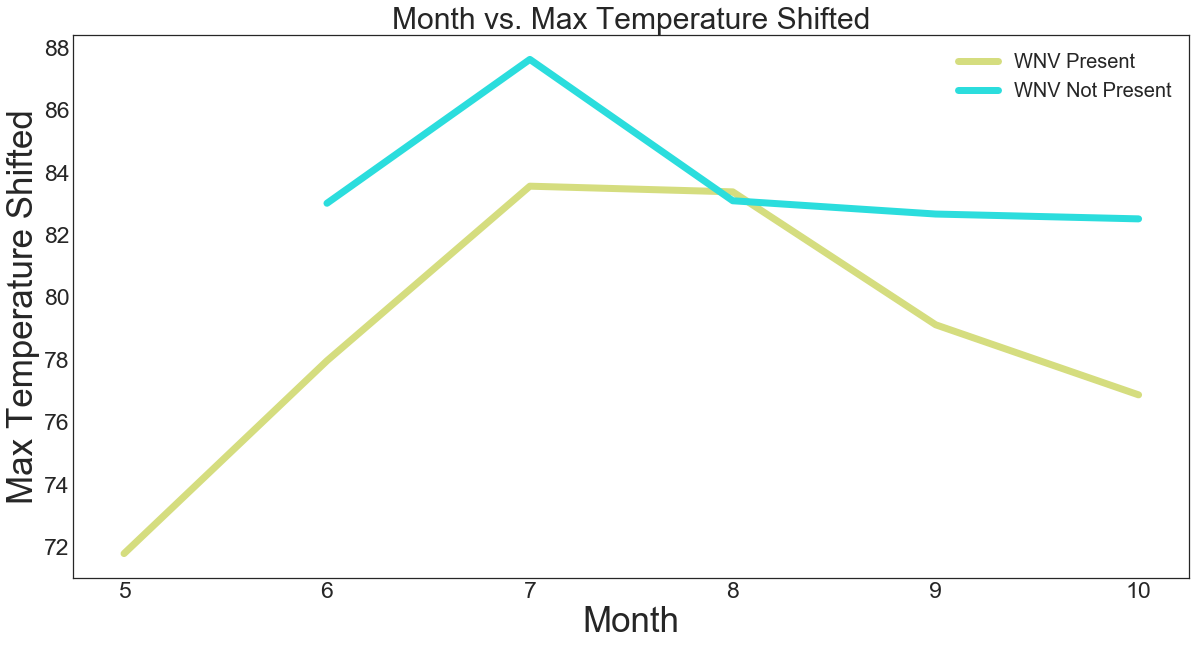

In [216]:
plt.figure(figsize=(20,10))
sns.lineplot(x=df['Month'], y=df['Tmax_shift'], hue = df['WnvPresent'], palette = 'rainbow_r', ci=None, lw=7)
plt.xlabel('Month', size=35)
plt.xticks(size=23)
plt.ylabel('Max Temperature Shifted', size=35)
plt.yticks(size=23)
plt.title("Month vs. Max Temperature Shifted", fontsize=30)
plt.legend(labels=['WNV Present','WNV Not Present'], fontsize=20);